### Importación de datos



In [46]:
import pandas as pd
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1['Origen'] = 'Tienda 1'
tienda2['Origen'] = 'Tienda 2'
tienda3['Origen'] = 'Tienda 3'
tienda4['Origen'] = 'Tienda 4'

tiendas=pd.concat([tienda1,tienda2,tienda3,tienda4])
tiendas.describe()

tiendas.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Origen
0,Asistente virtual,Electrónicos,"164,300.00","6,900.00",16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.61,-74.08,Tienda 1
1,Mesa de comedor,Muebles,"192,300.00","8,400.00",18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25,-75.56,Tienda 1
2,Juego de mesa,Juguetes,"209,600.00","15,900.00",15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.40,-75.51,Tienda 1
3,Microondas,Electrodomésticos,"757,500.00","41,000.00",03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.44,-76.52,Tienda 1
4,Silla de oficina,Muebles,"335,200.00","20,200.00",07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25,-75.56,Tienda 1


#1. Análisis de facturación



**Facturacion por tienda sin contar el costo de envio**

In [47]:
facturacion_por_tienda = tiendas.groupby('Origen')['Precio'].sum()
pd.set_option('display.float_format', '{:,.2f}'.format)
print(facturacion_por_tienda)

Origen
Tienda 1   1,150,880,400.00
Tienda 2   1,116,343,500.00
Tienda 3   1,098,019,600.00
Tienda 4   1,038,375,700.00
Name: Precio, dtype: float64


**Facturacion por tienda sumandole el costo de envio**

     Origen           Precio  Costo de envío  Facturación Total
0  Tienda 1 1,150,880,400.00   61,377,900.00   1,212,258,300.00
1  Tienda 2 1,116,343,500.00   59,485,100.00   1,175,828,600.00
2  Tienda 3 1,098,019,600.00   58,516,600.00   1,156,536,200.00
3  Tienda 4 1,038,375,700.00   55,317,400.00   1,093,693,100.00


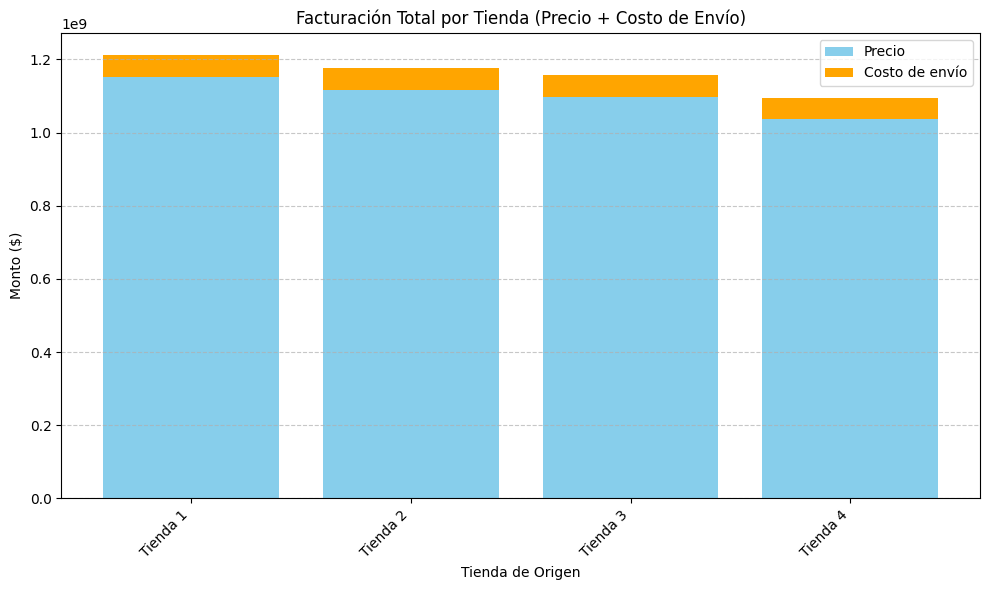

In [62]:
facturacion_con_envio = tiendas.groupby('Origen')[['Precio', 'Costo de envío']].sum().reset_index()
facturacion_con_envio['Facturación Total'] = facturacion_con_envio['Precio'] + facturacion_con_envio['Costo de envío']
pd.set_option('display.float_format', '{:,.2f}'.format)
print(facturacion_con_envio)
plt.figure(figsize=(10, 6))
bar1 = plt.bar(facturacion_con_envio['Origen'], facturacion_con_envio['Precio'], label='Precio', color='skyblue')
bar2 = plt.bar(facturacion_con_envio['Origen'], facturacion_con_envio['Costo de envío'],
               bottom=facturacion_con_envio['Precio'], label='Costo de envío', color='orange')

plt.title('Facturación Total por Tienda (Precio + Costo de Envío)')
plt.xlabel('Tienda de Origen')
plt.ylabel('Monto ($)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

**Ventas por categoria de todas las tiendas**

In [49]:
ventas_por_categoria = tiendas.groupby('Categoría del Producto')['Precio'].sum()
ventas_por_categoria = ventas_por_categoria.sort_values(ascending=False)
pd.set_option('display.float_format', '{:,.2f}'.format)
print(ventas_por_categoria)

Categoría del Producto
Electrónicos              1,660,576,500.00
Electrodomésticos         1,324,751,100.00
Muebles                     757,661,000.00
Instrumentos musicales      348,772,600.00
Deportes y diversión        142,977,700.00
Juguetes                     73,604,400.00
Artículos para el hogar      57,579,800.00
Libros                       37,696,100.00
Name: Precio, dtype: float64


Ventas por categoria para cada tienda


Ventas por categoría en Tienda 1:
Categoría del Producto
Electrónicos              429,493,500.00
Electrodomésticos         363,685,200.00
Muebles                   187,633,700.00
Instrumentos musicales     91,299,000.00
Deportes y diversión       39,290,000.00
Juguetes                   17,995,700.00
Artículos para el hogar    12,698,400.00
Libros                      8,784,900.00
Name: Precio, dtype: float64


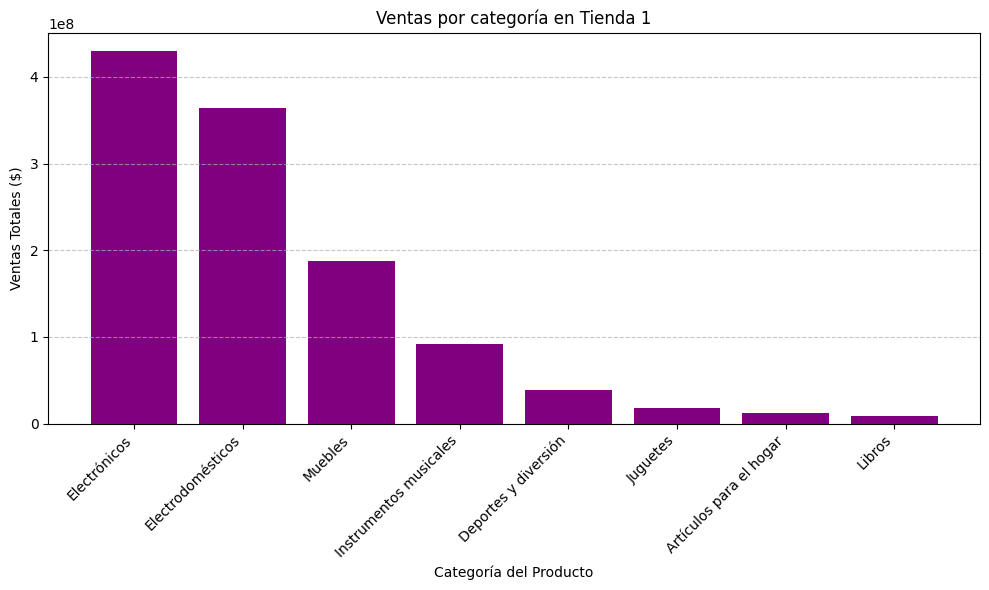


Ventas por categoría en Tienda 2:
Categoría del Producto
Electrónicos              410,831,100.00
Electrodomésticos         348,567,800.00
Muebles                   176,426,300.00
Instrumentos musicales    104,990,300.00
Deportes y diversión       34,744,500.00
Juguetes                   15,945,400.00
Artículos para el hogar    14,746,900.00
Libros                     10,091,200.00
Name: Precio, dtype: float64


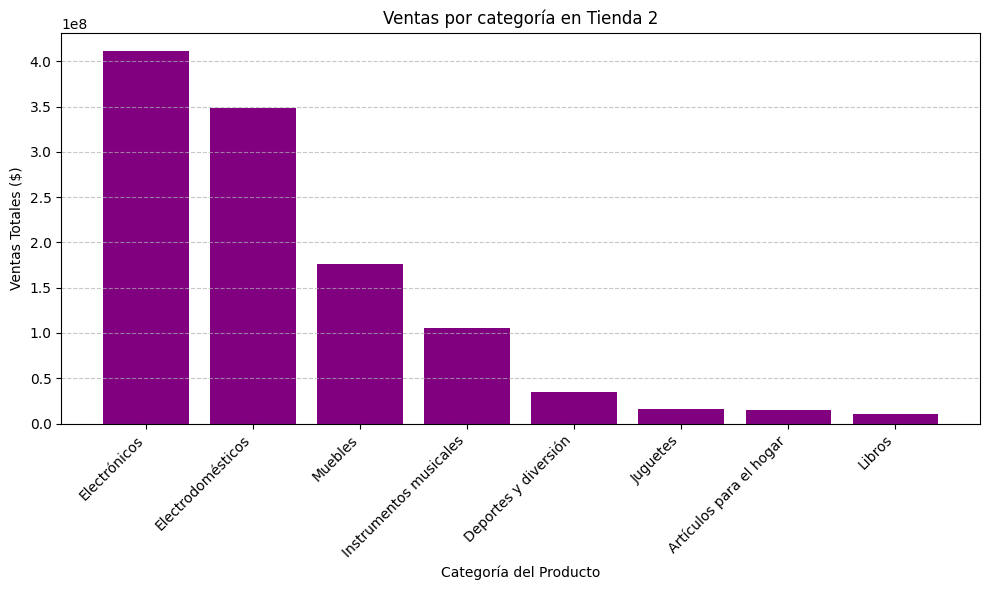


Ventas por categoría en Tienda 3:
Categoría del Producto
Electrónicos              410,775,800.00
Electrodomésticos         329,237,900.00
Muebles                   201,072,100.00
Instrumentos musicales     77,380,900.00
Deportes y diversión       35,593,100.00
Juguetes                   19,401,100.00
Artículos para el hogar    15,060,000.00
Libros                      9,498,700.00
Name: Precio, dtype: float64


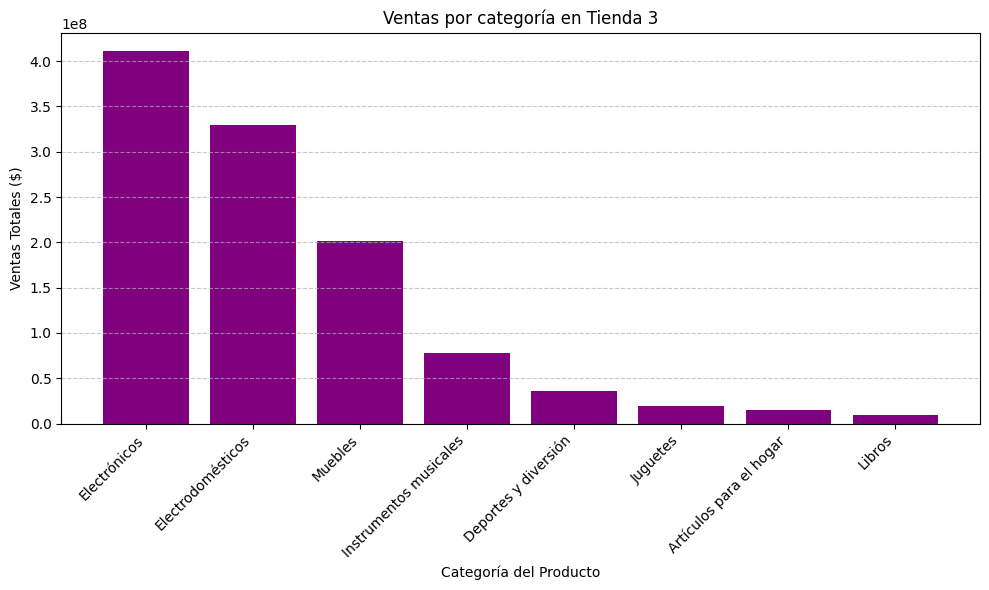


Ventas por categoría en Tienda 4:
Categoría del Producto
Electrónicos              409,476,100.00
Electrodomésticos         283,260,200.00
Muebles                   192,528,900.00
Instrumentos musicales     75,102,400.00
Deportes y diversión       33,350,100.00
Juguetes                   20,262,200.00
Artículos para el hogar    15,074,500.00
Libros                      9,321,300.00
Name: Precio, dtype: float64


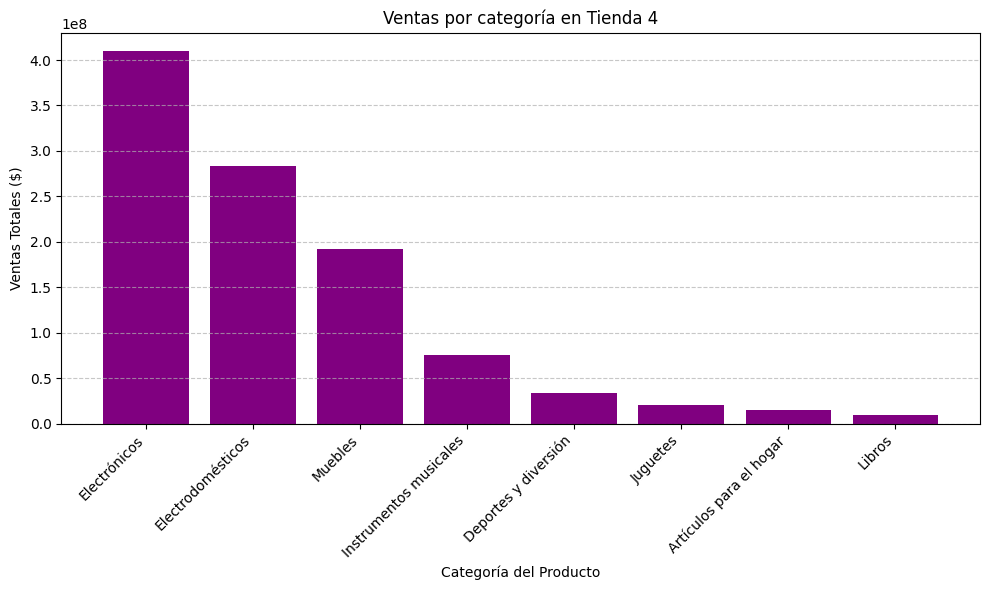

In [61]:
tiendas_unicas = tiendas['Origen'].unique()

for tienda_nombre in tiendas_unicas:
    print(f"\nVentas por categoría en {tienda_nombre}:")

    df_tienda = tiendas[tiendas['Origen'] == tienda_nombre]

    ventas_por_categoria = df_tienda.groupby('Categoría del Producto')['Precio'].sum()
    ventas_por_categoria = ventas_por_categoria.sort_values(ascending=False)

    print(ventas_por_categoria)
    plt.figure(figsize=(10, 6))
    plt.bar(ventas_por_categoria.index, ventas_por_categoria.values, color='purple')
    plt.title(f'Ventas por categoría en {tienda_nombre}')
    plt.xlabel('Categoría del Producto')
    plt.ylabel('Ventas Totales ($)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 3. Calificación promedio de la tienda


**Calificacion promedio por tienda**

In [51]:
calificacion_promedio = tiendas.groupby('Origen')['Calificación'].mean().reset_index()

# (Opcional) Redondear a 2 decimales
calificacion_promedio['Calificación'] = calificacion_promedio['Calificación'].round(2)

print(calificacion_promedio)

     Origen  Calificación
0  Tienda 1          3.98
1  Tienda 2          4.04
2  Tienda 3          4.05
3  Tienda 4          4.00


**Calificacion ordenada por tienda**

     Origen  Calificación
2  Tienda 3          4.05
1  Tienda 2          4.04
3  Tienda 4          4.00
0  Tienda 1          3.98


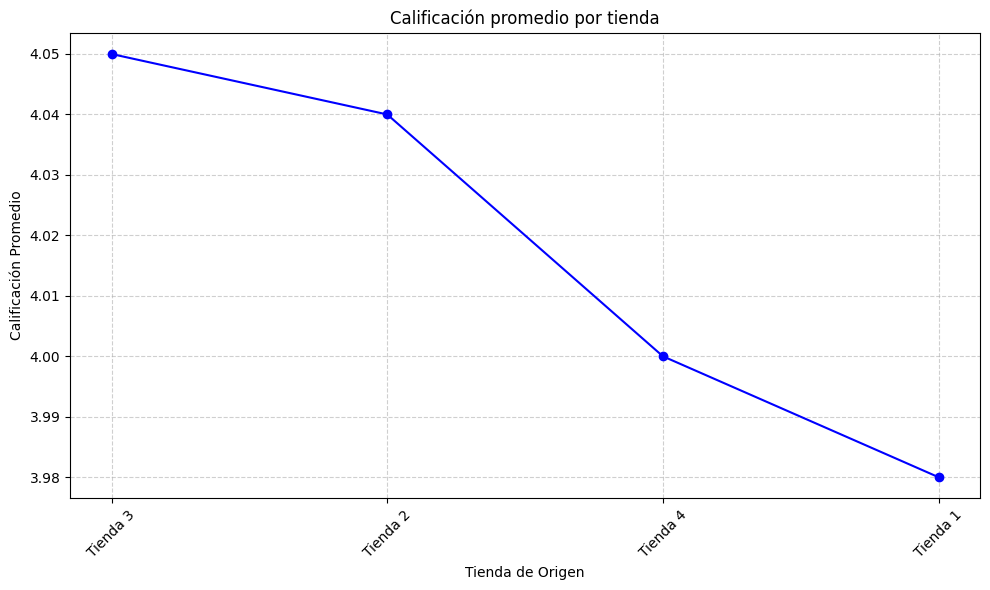

In [60]:
calificacion_promedio = calificacion_promedio.sort_values(by='Calificación', ascending=False)

print(calificacion_promedio)
plt.figure(figsize=(10, 6))
plt.plot(calificacion_promedio['Origen'], calificacion_promedio['Calificación'], marker='o', linestyle='-', color='blue')

plt.title('Calificación promedio por tienda')
plt.xlabel('Tienda de Origen')
plt.ylabel('Calificación Promedio')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

**Productos mas vendidos en todas las tiendas**

In [57]:
productos_mas_vendidos = tiendas['Producto'].value_counts().head(10).reset_index()
productos_mas_vendidos.columns = ['Producto', 'Cantidad de ventas']

print("Top 10 productos más vendidos:")
print(productos_mas_vendidos)

productos_menos_vendidos = tiendas['Producto'].value_counts(ascending=True).head(10).reset_index()
productos_menos_vendidos.columns = ['Producto', 'Cantidad de ventas']

print("\nTop 10 productos menos vendidos:")
print(productos_menos_vendidos)


Top 10 productos más vendidos:
                    Producto  Cantidad de ventas
0              Mesa de noche                 210
1  Carrito de control remoto                 206
2                 Microondas                 206
3                    Batería                 203
4                  Cama king                 201
5           Secadora de ropa                 200
6        Modelado predictivo                 200
7               Set de ollas                 200
8                   Cama box                 199
9    Bloques de construcción                 199

Top 10 productos menos vendidos:
                      Producto  Cantidad de ventas
0                 Celular ABXY                 157
1    Auriculares con micrófono                 158
2                      Mochila                 163
3           Guitarra eléctrica                 165
4  Ciencia de datos con Python                 166
5            Asistente virtual                 167
6                       Sillón         


**Productos mas vendidos y menos vendidos por tienda**



Tienda: Tienda 1

Top 10 productos más vendidos:
                  Producto  Cantidad de ventas
0               Microondas                  60
1            TV LED UHD 4K                  60
2                  Armario                  60
3         Secadora de ropa                  58
4            Mesa de noche                  56
5  Bloques de construcción                  56
6      Balón de baloncesto                  55
7                Bicicleta                  54
8             Vaso térmico                  54
9             Refrigerador                  54


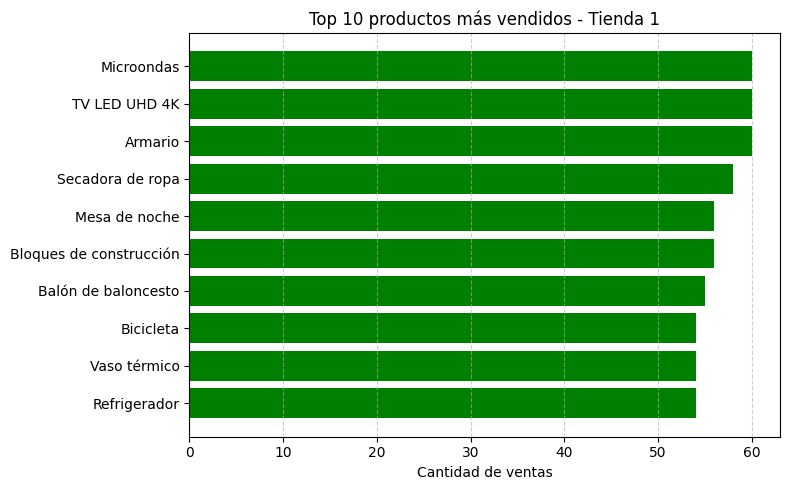


 Top 10 productos menos vendidos:
                      Producto  Cantidad de ventas
0    Auriculares con micrófono                  33
1                 Celular ABXY                  33
2              Olla de presión                  35
3                    Pandereta                  36
4                      Mochila                  39
5  Ciencia de datos con Python                  39
6            Asistente virtual                  40
7              Mesa de comedor                  40
8                  Muñeca bebé                  40
9               Dinosaurio Rex                  40


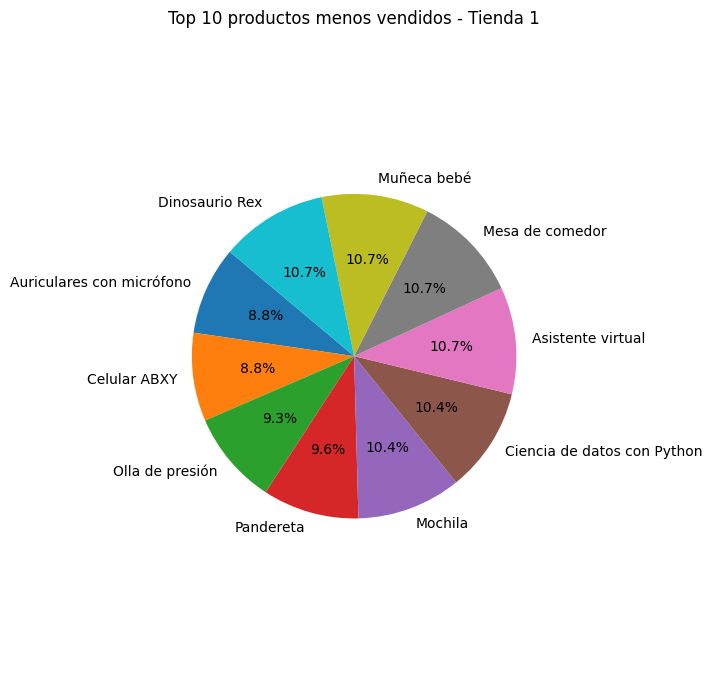



Tienda: Tienda 2

Top 10 productos más vendidos:
                    Producto  Cantidad de ventas
0  Iniciando en programación                  65
1                 Microondas                  62
2                    Batería                  61
3          Guitarra acústica                  58
4                  Pandereta                  58
5           Secadora de ropa                  57
6                  Iphone 15                  55
7    Bloques de construcción                  54
8                    Armario                  54
9               Set de ollas                  52


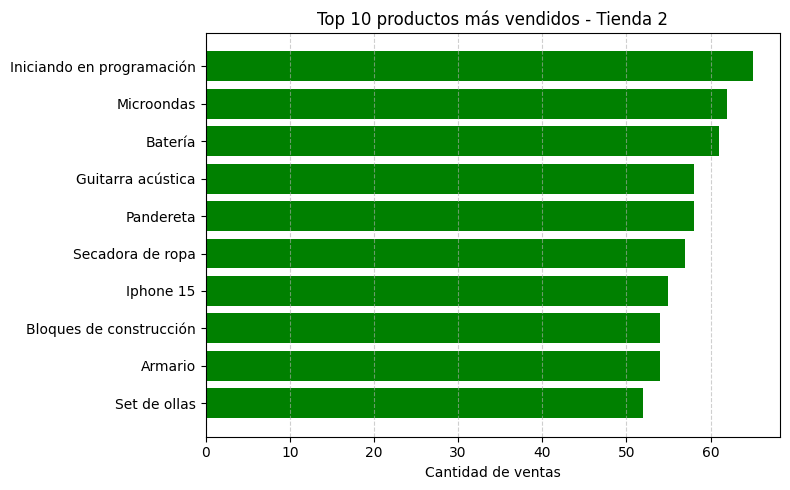


 Top 10 productos menos vendidos:
            Producto  Cantidad de ventas
0      Juego de mesa                  32
1    Mesa de comedor                  34
2          Impresora                  34
3             Sillón                  35
4        Auriculares                  37
5  Asistente virtual                  38
6         Cubertería                  39
7           Smart TV                  40
8       Celular ABXY                  41
9             Estufa                  42


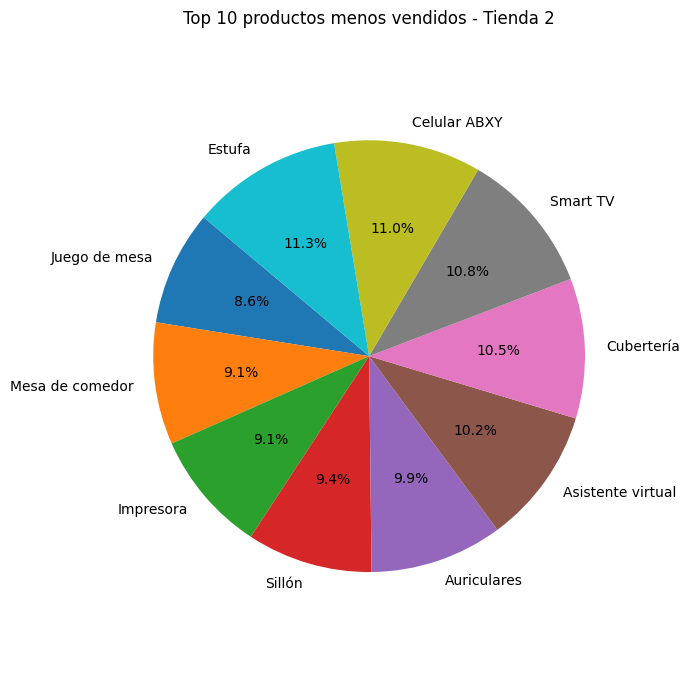



Tienda: Tienda 3

Top 10 productos más vendidos:
                    Producto  Cantidad de ventas
0              Kit de bancas                  57
1            Mesa de comedor                  56
2                  Cama king                  56
3               Set de ollas                  55
4              Mesa de noche                  55
5                   Smart TV                  54
6                     Estufa                  53
7         Cuerda para saltar                  53
8        Modelado predictivo                  53
9  Carrito de control remoto                  52


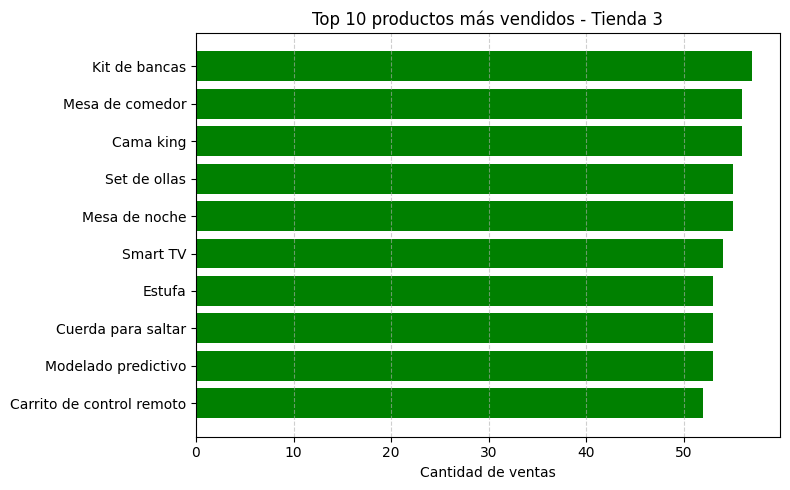


 Top 10 productos menos vendidos:
                    Producto  Cantidad de ventas
0    Bloques de construcción                  35
1               Set de vasos                  36
2                 Microondas                  36
3                    Mochila                  36
4         Guitarra eléctrica                  38
5               Vaso térmico                  38
6                Muñeca bebé                  39
7                 Cubertería                  39
8          Asistente virtual                  39
9  Auriculares con micrófono                  39


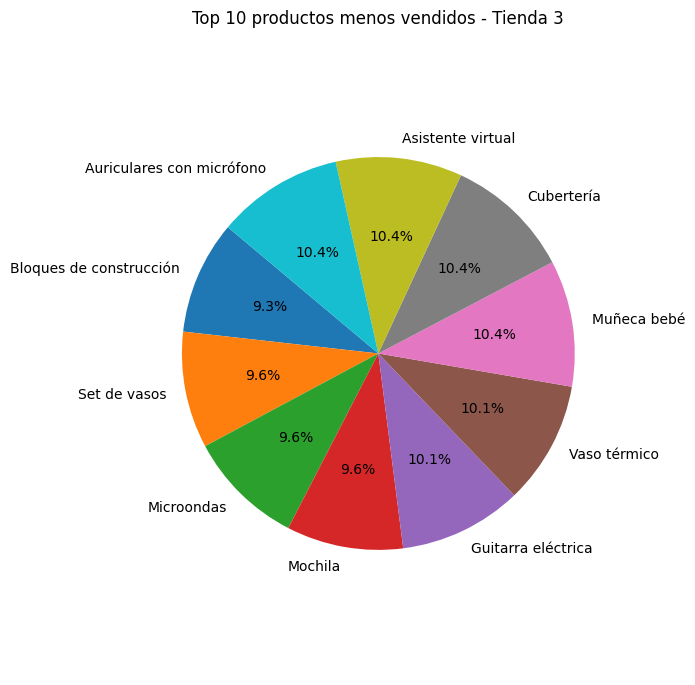



Tienda: Tienda 4

Top 10 productos más vendidos:
                    Producto  Cantidad de ventas
0                   Cama box                  62
1                 Cubertería                  59
2    Dashboards con Power BI                  56
3                  Cama king                  56
4  Carrito de control remoto                  55
5            Mesa de comedor                  55
6              Mesa de noche                  55
7                   Smart TV                  54
8    Bloques de construcción                  54
9                  Pandereta                  52


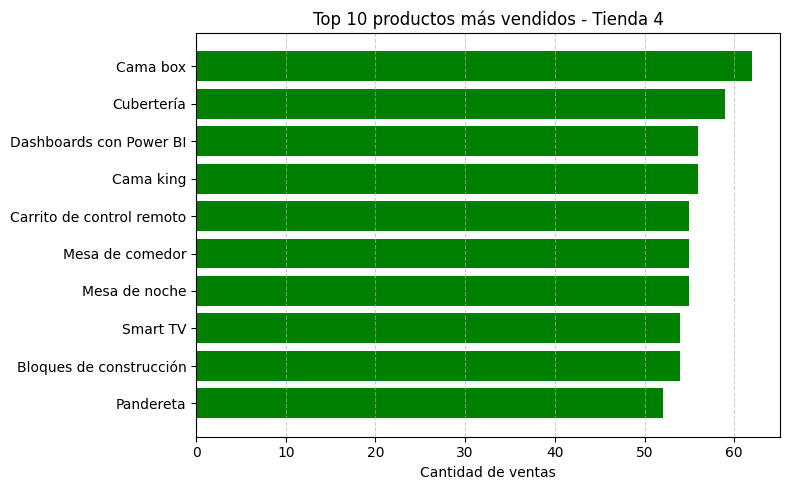


 Top 10 productos menos vendidos:
                      Producto  Cantidad de ventas
0           Guitarra eléctrica                  33
1                      Armario                  34
2            Guitarra acústica                  37
3                 Refrigerador                  38
4             Lavadora de ropa                  38
5  Ciencia de datos con Python                  38
6                 Celular ABXY                  39
7            Ajedrez de madera                  39
8                   Smartwatch                  39
9                TV LED UHD 4K                  40


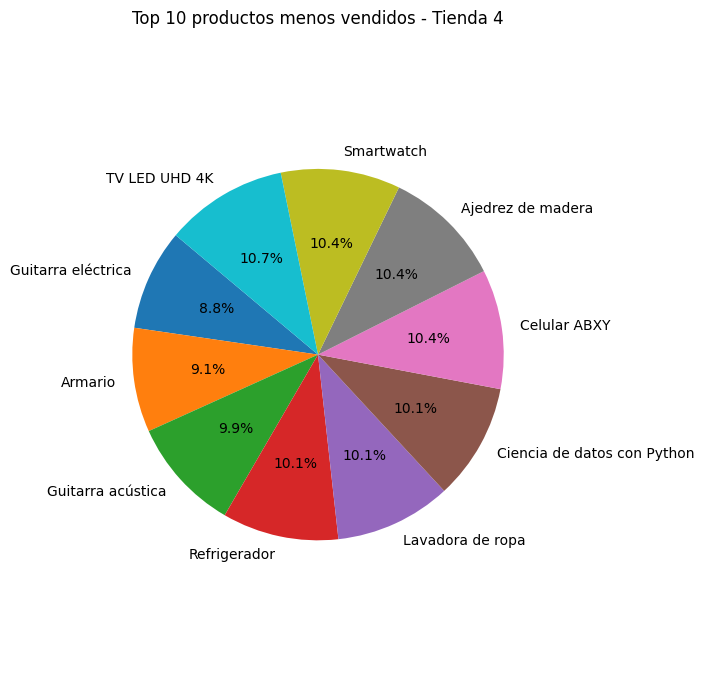

In [58]:
for tienda_nombre in tiendas_unicas:
    print(f"\n\nTienda: {tienda_nombre}")

    df_tienda = tiendas[tiendas['Origen'] == tienda_nombre]

    productos_mas_vendidos = df_tienda['Producto'].value_counts().head(10).reset_index()
    productos_mas_vendidos.columns = ['Producto', 'Cantidad de ventas']
    print("\nTop 10 productos más vendidos:")
    print(productos_mas_vendidos)
    plt.figure(figsize=(8, 5))
    plt.barh(productos_mas_vendidos['Producto'], productos_mas_vendidos['Cantidad de ventas'], color='green')
    plt.xlabel('Cantidad de ventas')
    plt.title(f'Top 10 productos más vendidos - {tienda_nombre}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()

    productos_menos_vendidos = df_tienda['Producto'].value_counts(ascending=True).head(10).reset_index()
    productos_menos_vendidos.columns = ['Producto', 'Cantidad de ventas']
    print("\n Top 10 productos menos vendidos:")
    print(productos_menos_vendidos)
    plt.figure(figsize=(7, 7))
    plt.pie(productos_menos_vendidos['Cantidad de ventas'],
            labels=productos_menos_vendidos['Producto'],
            autopct='%1.1f%%', startangle=140)
    plt.title(f'Top 10 productos menos vendidos - {tienda_nombre}')
    plt.axis('equal')  # Mantiene el círculo bien proporcionado
    plt.tight_layout()
    plt.show()

# 5. Envío promedio por tienda

In [55]:
envio_promedio_por_tienda = tiendas.groupby('Origen')['Costo de envío'].mean().reset_index()
envio_promedio_por_tienda['Costo de envío'] = envio_promedio_por_tienda['Costo de envío'].round(2)
print(envio_promedio_por_tienda)

     Origen  Costo de envío
0  Tienda 1       26,018.61
1  Tienda 2       25,216.24
2  Tienda 3       24,805.68
3  Tienda 4       23,459.46


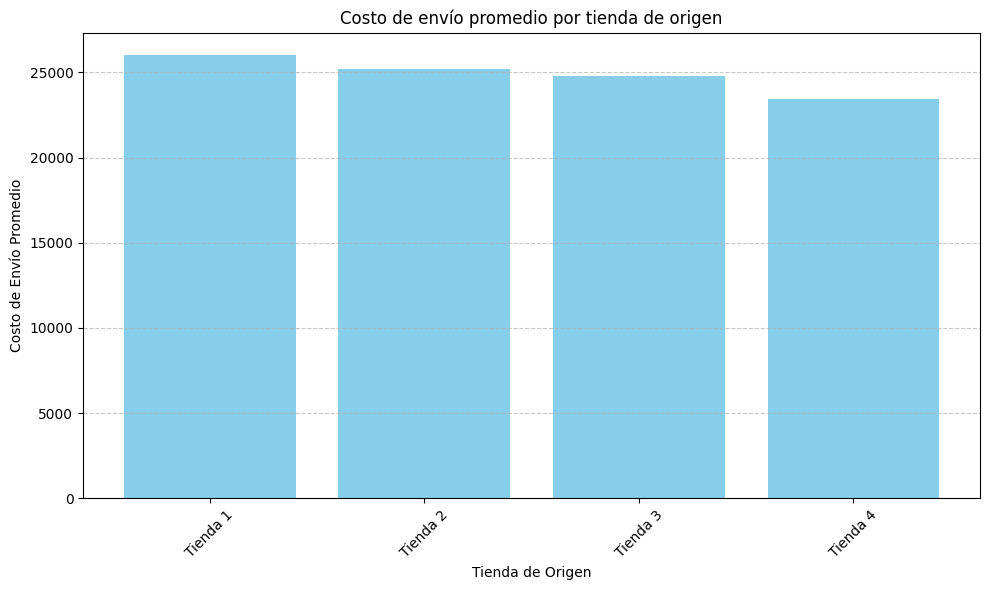

In [56]:
plt.figure(figsize=(10, 6))
plt.bar(envio_promedio_por_tienda['Origen'], envio_promedio_por_tienda['Costo de envío'], color='skyblue')
plt.title('Costo de envío promedio por tienda de origen')
plt.xlabel('Tienda de Origen')
plt.ylabel('Costo de Envío Promedio')
plt.xticks(rotation=45)  # Rotar etiquetas si hay muchas tiendas
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()